# Series Post Dataset Metrics

## Section: Import Data
This section focuses on import libraries and players_teams dataset.
The process involves:
- import pandas and matplotlib.pyplot libraries
- import series_post dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

! pip install tabulate
from tabulate import tabulate

# Load the series_post dataset
series_post = pd.read_csv('../basketballPlayoffs/series_post.csv', delimiter=",")


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\hreis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Section: Explore Data
This section focuses on extract relevant informations about the dataset. The process involves:
- Teams that won in the playoffs each year
- Teams that won and lost each year
- Total appearances of each team in the finals

### Teams that won in the playoffs each year

<Figure size 1200x800 with 0 Axes>

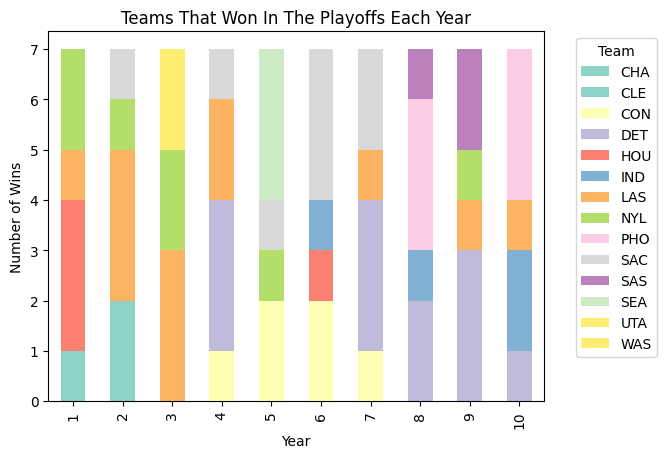

In [23]:
# Group the data by year and count the number of wins for each team in each year
team_wins_by_year = series_post.groupby(['year', 'tmIDWinner'])['W'].count().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
team_wins_by_year.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Teams That Won In The Playoffs Each Year')

# Show the chart
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Teams that won and lost each year

In [24]:
# Filter for the "F" (Finals) round
finals_data = series_post[series_post['round'] == 'F']

# Create a DataFrame with the winning and losing teams for each year
finals_results = finals_data[['year', 'tmIDWinner', 'tmIDLoser']]

# Convert the DataFrame to a prettily formatted table
table = tabulate(finals_results, headers='keys', tablefmt='fancy_grid', showindex=False)

# Display the formatted table
print(table)

╒════════╤══════════════╤═════════════╕
│   year │ tmIDWinner   │ tmIDLoser   │
╞════════╪══════════════╪═════════════╡
│      1 │ HOU          │ NYL         │
├────────┼──────────────┼─────────────┤
│      2 │ LAS          │ CHA         │
├────────┼──────────────┼─────────────┤
│      3 │ LAS          │ NYL         │
├────────┼──────────────┼─────────────┤
│      4 │ DET          │ LAS         │
├────────┼──────────────┼─────────────┤
│      5 │ SEA          │ CON         │
├────────┼──────────────┼─────────────┤
│      6 │ SAC          │ CON         │
├────────┼──────────────┼─────────────┤
│      7 │ DET          │ SAC         │
├────────┼──────────────┼─────────────┤
│      8 │ PHO          │ DET         │
├────────┼──────────────┼─────────────┤
│      9 │ DET          │ SAS         │
├────────┼──────────────┼─────────────┤
│     10 │ PHO          │ IND         │
╘════════╧══════════════╧═════════════╛


### Total appearances of each team in the finals

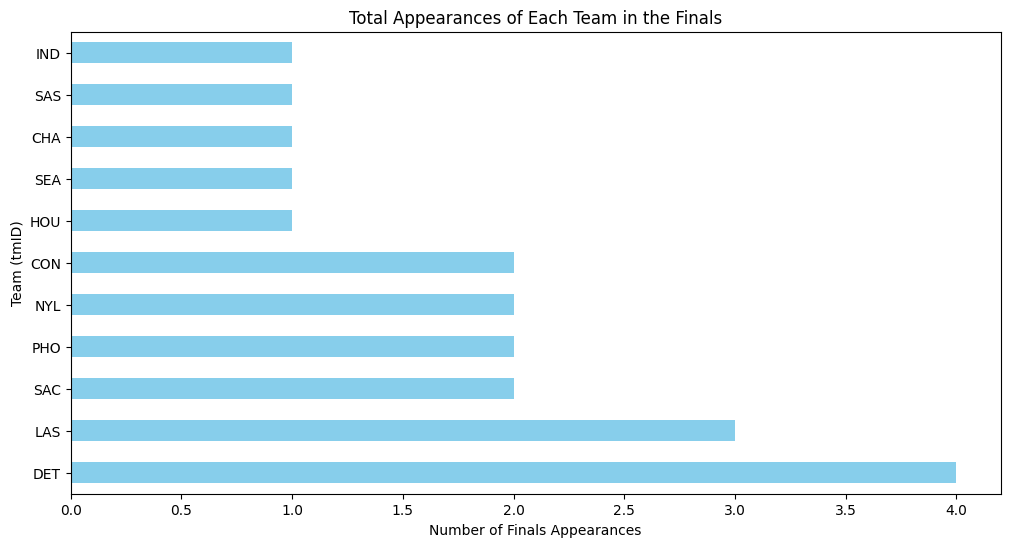

In [25]:
# Filter for the "F" (Finals) round
finals_data = series_post[series_post['round'] == 'F']

# Count how many times each team has appeared in the Finals as either a winner or a loser
team_appearances = pd.concat([finals_data['tmIDWinner'], finals_data['tmIDLoser']]).value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
team_appearances.plot(kind='barh', color='skyblue')

# Add labels and title
plt.ylabel('Team (tmID)')
plt.xlabel('Number of Finals Appearances')
plt.title('Total Appearances of Each Team in the Finals')

# Show the chart
plt.show()
